# COCO 2017

In [1]:
import json

# Load the instances_val2017.json file
with open("annotations/instances_train2017.json", "r") as file:
    instances_data = json.load(file)

# Display the keys in the loaded data
instances_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

okay, lets get the categories

In [2]:
# Extract the categories from the data
categories = instances_data["categories"]

# Create a mapping of category id to category name and index
category_id_to_name = {cat["id"]: cat["name"] for cat in categories}
# Using for to make numbers 0 to ~
category_id_to_idx = {cat["id"]: idx for idx, cat in enumerate(categories)}

category_id_to_name

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [3]:
category_id_to_idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 21: 19,
 22: 20,
 23: 21,
 24: 22,
 25: 23,
 27: 24,
 28: 25,
 31: 26,
 32: 27,
 33: 28,
 34: 29,
 35: 30,
 36: 31,
 37: 32,
 38: 33,
 39: 34,
 40: 35,
 41: 36,
 42: 37,
 43: 38,
 44: 39,
 46: 40,
 47: 41,
 48: 42,
 49: 43,
 50: 44,
 51: 45,
 52: 46,
 53: 47,
 54: 48,
 55: 49,
 56: 50,
 57: 51,
 58: 52,
 59: 53,
 60: 54,
 61: 55,
 62: 56,
 63: 57,
 64: 58,
 65: 59,
 67: 60,
 70: 61,
 72: 62,
 73: 63,
 74: 64,
 75: 65,
 76: 66,
 77: 67,
 78: 68,
 79: 69,
 80: 70,
 81: 71,
 82: 72,
 84: 73,
 85: 74,
 86: 75,
 87: 76,
 88: 77,
 89: 78,
 90: 79}

Okay so the we have 80 labels (when you see close, some labels numbers skip).  
now, lets get the image data and change it to yolo form

# Image

In [4]:
# Create a mapping of image id to its width and height
image_id_to_dimensions = {img["id"]: (img["width"], img["height"]) for img in instances_data["images"]}

# Display a sample of the mapping
sample_dimensions = {k: image_id_to_dimensions[k] for k in list(image_id_to_dimensions)[:20]}
sample_dimensions

{391895: (640, 360),
 522418: (640, 480),
 184613: (500, 336),
 318219: (556, 640),
 554625: (426, 640),
 574769: (480, 640),
 60623: (640, 427),
 309022: (640, 480),
 5802: (640, 479),
 222564: (640, 480),
 118113: (480, 640),
 193271: (480, 320),
 224736: (640, 427),
 483108: (428, 640),
 403013: (301, 450),
 374628: (640, 326),
 328757: (500, 332),
 384213: (375, 500),
 293802: (425, 640),
 86408: (640, 427)}

so the image number is 397133 and the image size is 640,427. Lets see if thats right

In [5]:
len(sample_dimensions)

20

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# 예상되는 이미지 디렉토리 경로 (실제 이미지 파일이 있는 경로로 변경해야 합니다.)
image_dir = "train2017"

# 주어진 이미지 ID 리스트를 기반으로 이미지를 로드하고 출력합니다.
for image_id in sample_dimensions.keys():
    image_path = f"{image_dir}/{image_id:012d}.jpg"
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f"Image ID: {image_id}")
        plt.axis('off')  # 축 번호와 눈금을 끕니다.
        plt.show()
    except FileNotFoundError:
        print(f"File {image_path} not found. Please ensure the image exists in the specified directory.")

File train2017/000000391895.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000522418.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000184613.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000318219.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000554625.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000574769.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000060623.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000309022.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000005802.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000222564.jpg not found. Please ensure the image exists in the s

okay we can see the images. good. Lets see the yolo boxes too.   
First, we have to get the annotations and change it to yolo boxes 

In [7]:
# Convert COCO annotations to YOLO format
yolo_annotations = {}

for annotation in instances_data["annotations"]:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]
    
    # Convert COCO bbox (x-top-left, y-top-left, width, height) to YOLO format (x-center, y-center, width, height)
    x_center = (bbox[0] + bbox[2] / 2) / image_id_to_dimensions[image_id][0]
    y_center = (bbox[1] + bbox[3] / 2) / image_id_to_dimensions[image_id][1]
    width = bbox[2] / image_id_to_dimensions[image_id][0]
    height = bbox[3] / image_id_to_dimensions[image_id][1]
    
    # Get the YOLO label index
    label_idx = category_id_to_idx[category_id]
    
    # Append to yolo_annotations
    if image_id not in yolo_annotations:
        yolo_annotations[image_id] = []
    yolo_annotations[image_id].append([label_idx, x_center, y_center, width, height])

# Display a sample of the converted annotations
sample_annotations = {k: yolo_annotations[k] for k in list(yolo_annotations)[:2]}
sample_annotations

{558840: [[52,
   0.3729609375,
   0.5524590163934426,
   0.12142187499999998,
   0.16599531615925056],
  [39,
   0.5345390624999999,
   0.36855971896955503,
   0.052609375,
   0.24822014051522248],
  [39, 0.288375, 0.3169672131147541, 0.049093750000000005, 0.2077985948477752],
  [41,
   0.030304687500000003,
   0.4112060889929742,
   0.054609375,
   0.41065573770491803],
  [0, 0.7696640625, 0.40497658079625287, 0.456265625, 0.8049414519906323],
  [39, 0.38909375, 0.1898946135831382, 0.0310625, 0.17969555035128806],
  [44, 0.696640625, 0.5631850117096019, 0.11225, 0.11737704918032786],
  [0, 0.07421875, 0.1900351288056206, 0.1454375, 0.3752927400468384],
  [39,
   0.45666406249999997,
   0.10443793911007025,
   0.049609375,
   0.144192037470726],
  [60, 0.2859375, 0.8012997658079625, 0.56146875, 0.36625292740046833],
  [44,
   0.7030234375,
   0.5388524590163934,
   0.11373437500000001,
   0.1320374707259953]],
 200365: [[52,
   0.48267968749999995,
   0.7008020833333333,
   0.23342187

okay looks like we made it well  
Now lets make the fuc that draws the yolo boxes

first the functions

In [8]:
# Function to draw the bounding boxes on the image using YOLO annotations
def draw_boxes(image, annotations, category_id_to_name):
    import matplotlib.patches as patches
    
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    # Image dimensions
    im_width, im_height = image.size
    
    for annotation in annotations:
        label_idx, x_center, y_center, width, height = annotation
        
        # Convert YOLO format (x-center, y-center, width, height) to top-left x, top-left y, width, height
        x = (x_center - width / 2) * im_width
        y = (y_center - height / 2) * im_height
        box_width = width * im_width
        box_height = height * im_height
        
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
        
        # Draw rectangle on the image
        ax.add_patch(rect)
        
        # Add label
        label_name = category_id_to_name[list(category_id_to_idx.keys())[label_idx]]
        plt.text(x, y, label_name, color='white', bbox=dict(facecolor='red', edgecolor='red', pad=0))
    
    # Display the image
    plt.axis('off')
    plt.show()

In [9]:
# Display bounding boxes on the first 5 images using the yolo_annotations dictionary
first_5_image_ids = list(yolo_annotations.keys())[:5]

for image_id in first_5_image_ids:
    image_path = f"{image_dir}/{image_id:012d}.jpg"
    try:
        image = Image.open(image_path)
        draw_boxes(image, yolo_annotations[image_id], category_id_to_name)
    except FileNotFoundError:
        print(f"File {image_path} not found. Please ensure the image exists in the specified directory.")

File train2017/000000558840.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000200365.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000495357.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000116061.jpg not found. Please ensure the image exists in the specified directory.
File train2017/000000016164.jpg not found. Please ensure the image exists in the specified directory.


In [10]:
# Create a mapping of image id to its file name
image_id_to_filename = {img["id"]: img["file_name"] for img in instances_data["images"]}

# Display a sample of the mapping
sample_filenames = {k: image_id_to_filename[k] for k in list(image_id_to_filename)[:5]}
sample_filenames

{391895: '000000391895.jpg',
 522418: '000000522418.jpg',
 184613: '000000184613.jpg',
 318219: '000000318219.jpg',
 554625: '000000554625.jpg'}

In [11]:
import os

# Directory to save the YOLO formatted annotations
output_dir = "yolo_annotations/"
os.makedirs(output_dir, exist_ok=True)

for image_id, annotations in yolo_annotations.items():
    filename = image_id_to_filename[image_id].replace(".jpg", ".txt")
    with open(os.path.join(output_dir, filename), 'w') as file:
        for annotation in annotations:
            line = " ".join(map(str, annotation))
            file.write(line + "\n")

# Return the path to the directory containing the saved annotations
output_dir

'yolo_annotations/'

okay... looks good!, lets do the same thing for test , val dataset

In [12]:
import json

# Load the instances_val2017.json file
with open("annotations/instances_val2017.json", "r") as file:
    instances_data = json.load(file)

image_id_to_dimensions = {img["id"]: (img["width"], img["height"]) for img in instances_data["images"]}

# Convert COCO annotations to YOLO format
val_yolo_annotations = {}

for annotation in instances_data["annotations"]:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]
    
    # Convert COCO bbox (x-top-left, y-top-left, width, height) to YOLO format (x-center, y-center, width, height)
    x_center = (bbox[0] + bbox[2] / 2) / image_id_to_dimensions[image_id][0]
    y_center = (bbox[1] + bbox[3] / 2) / image_id_to_dimensions[image_id][1]
    width = bbox[2] / image_id_to_dimensions[image_id][0]
    height = bbox[3] / image_id_to_dimensions[image_id][1]
    
    # Get the YOLO label index
    label_idx = category_id_to_idx[category_id]
    
    # Append to yolo_annotations
    if image_id not in yolo_annotations:
        val_yolo_annotations[image_id] = []
    val_yolo_annotations[image_id].append([label_idx, x_center, y_center, width, height])

# Create a mapping of image id to its file name
image_id_to_filename = {img["id"]: img["file_name"] for img in instances_data["images"]}

import os

# Directory to save the YOLO formatted annotations
output_dir = "val_yolo_annotations/"
os.makedirs(output_dir, exist_ok=True)

for image_id, annotations in val_yolo_annotations.items():
    filename = image_id_to_filename[image_id].replace(".jpg", ".txt")
    with open(os.path.join(output_dir, filename), 'w') as file:
        for annotation in annotations:
            line = " ".join(map(str, annotation))
            file.write(line + "\n")

# Return the path to the directory containing the saved annotations
output_dir

'val_yolo_annotations/'

# YAML
Now , to use the yolo5 we have to make the yaml file

In [13]:
# Create the .yaml file based on the provided structure and annotations

# Assuming the classes are based on the COCO dataset loaded earlier
class_names = [category["name"] for category in instances_data["categories"]]

# Paths for the dataset
dataset_name = "coco2017" 
train_images_path = f"../{dataset_name}/images/train/"
val_images_path = f"../{dataset_name}/images/val/"
train_labels_path = f"../{dataset_name}/labels/train/"
val_labels_path = f"../{dataset_name}/labels/val/"

# Construct the .yaml content
yaml_content = {
    "names": class_names,
    "nc": len(class_names),
    "train": train_images_path,
    "val": val_images_path,
    "train_label": train_labels_path,
    "val_label": val_labels_path
}

# Save the .yaml content to a file
yaml_filename = "coco2017.yaml"
with open(yaml_filename, 'w') as yaml_file:
    for key, value in yaml_content.items():
        if isinstance(value, list):  # For the 'names' list
            yaml_file.write(f"{key}:\n")
            for item in value:
                yaml_file.write(f"  - {item}\n")
        else:
            yaml_file.write(f"{key}: {value}\n")

yaml_filename

'coco2017.yaml'

In [17]:
# Extracting parameters for the training command using the variables we've used so far

# Image size for training
img_size = 640

# Batch size
batch_size = 16

# Number of epochs
num_epochs = 10

# Path to the YAML file
data_path = './coco2017.yaml'

# Model configuration
cfg_path = "./yolov5/models/yolov5s.yaml"  # Example using the small model configuration

# Initial weights for training
weights_path = "yolov5s.pt"

# Adjust the train_command to use the relative path to train.py
train_script_path = "./yolov5/train.py"

# cpu,cuda,metal (apple)
#device = "metal"
device = 'mps'  

# Construct the command with the relative path
train_command = f"python {train_script_path} --img {img_size} --batch {batch_size} --epochs {num_epochs} --data {data_path} --cfg {cfg_path} --weights {weights_path} --device {device}"

!{train_command}

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./coco2017.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=mps, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), 2.56 KiB | 262.00 KiB/s, done.
From https://github.com/ultralytics/yolov5
   dd10481..94e943e  master     -> origin/master
github: ⚠️ YOLOv5 is

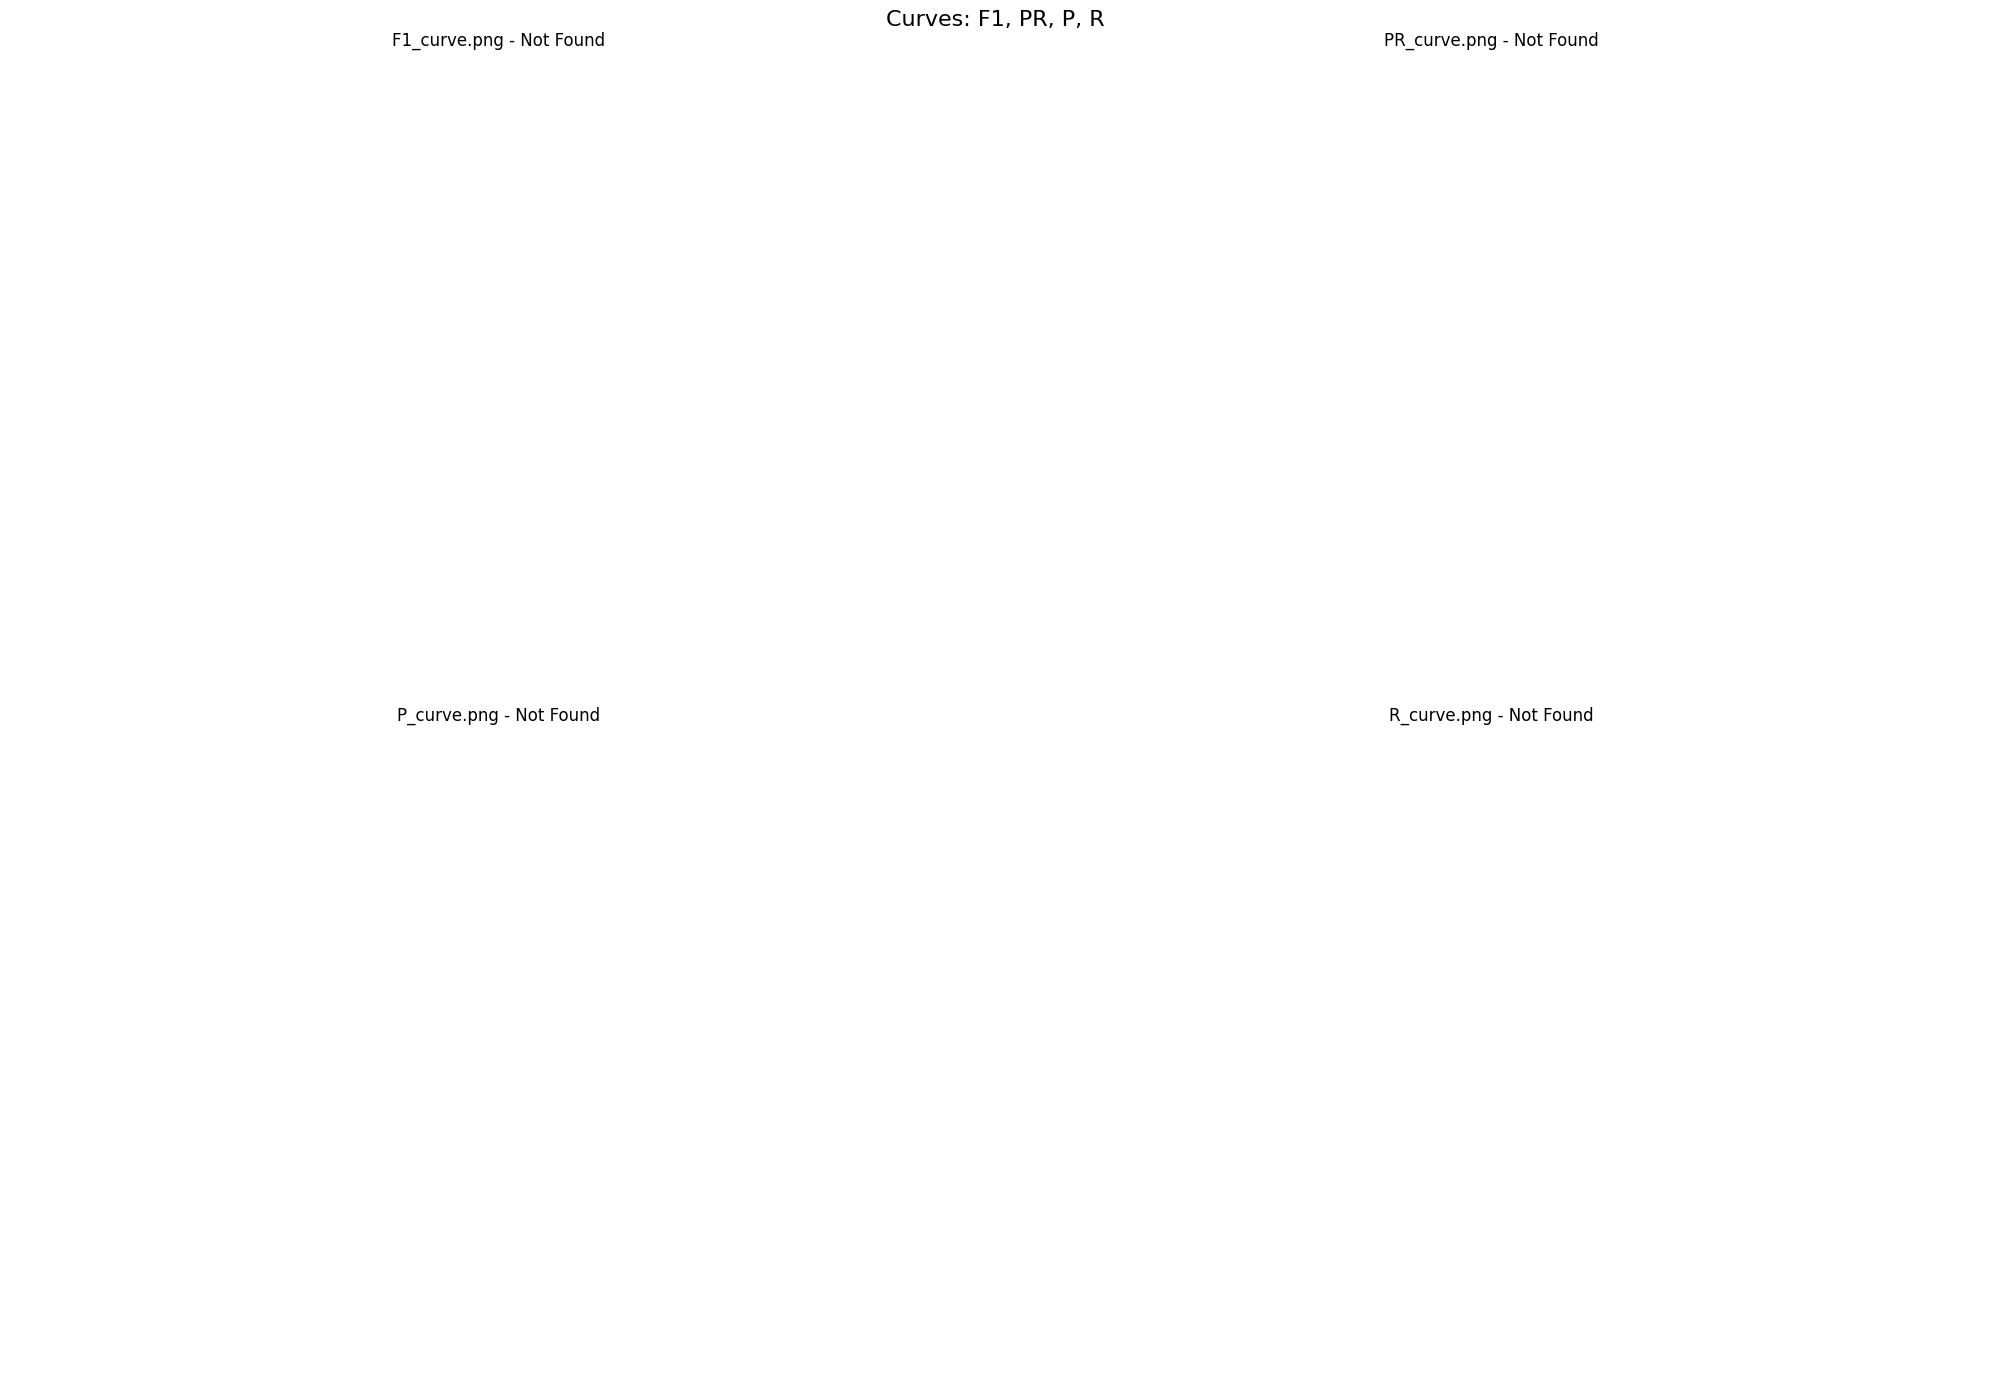

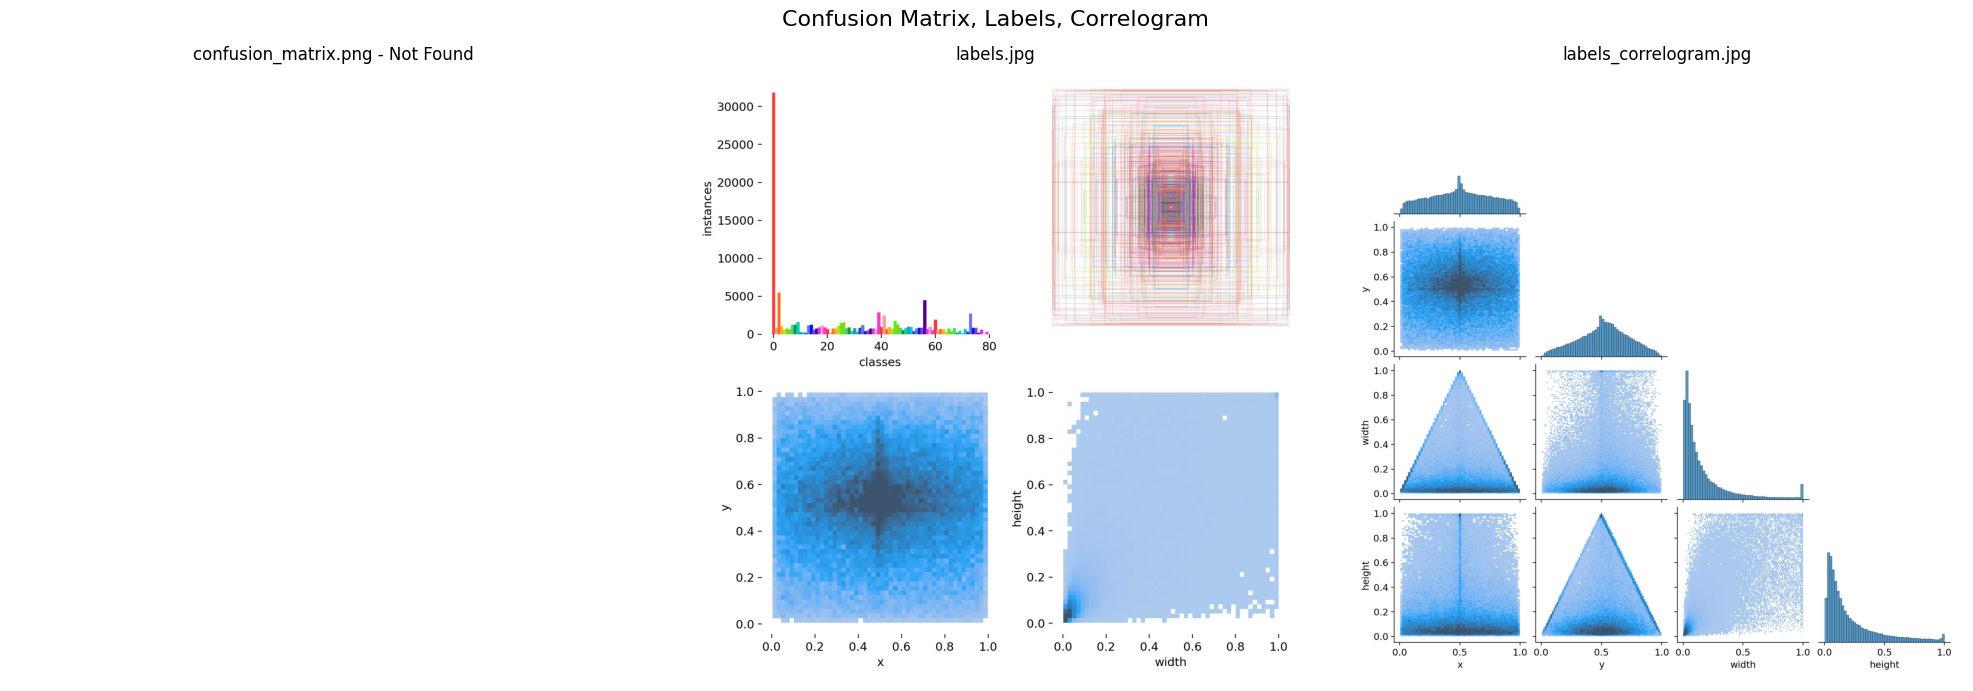

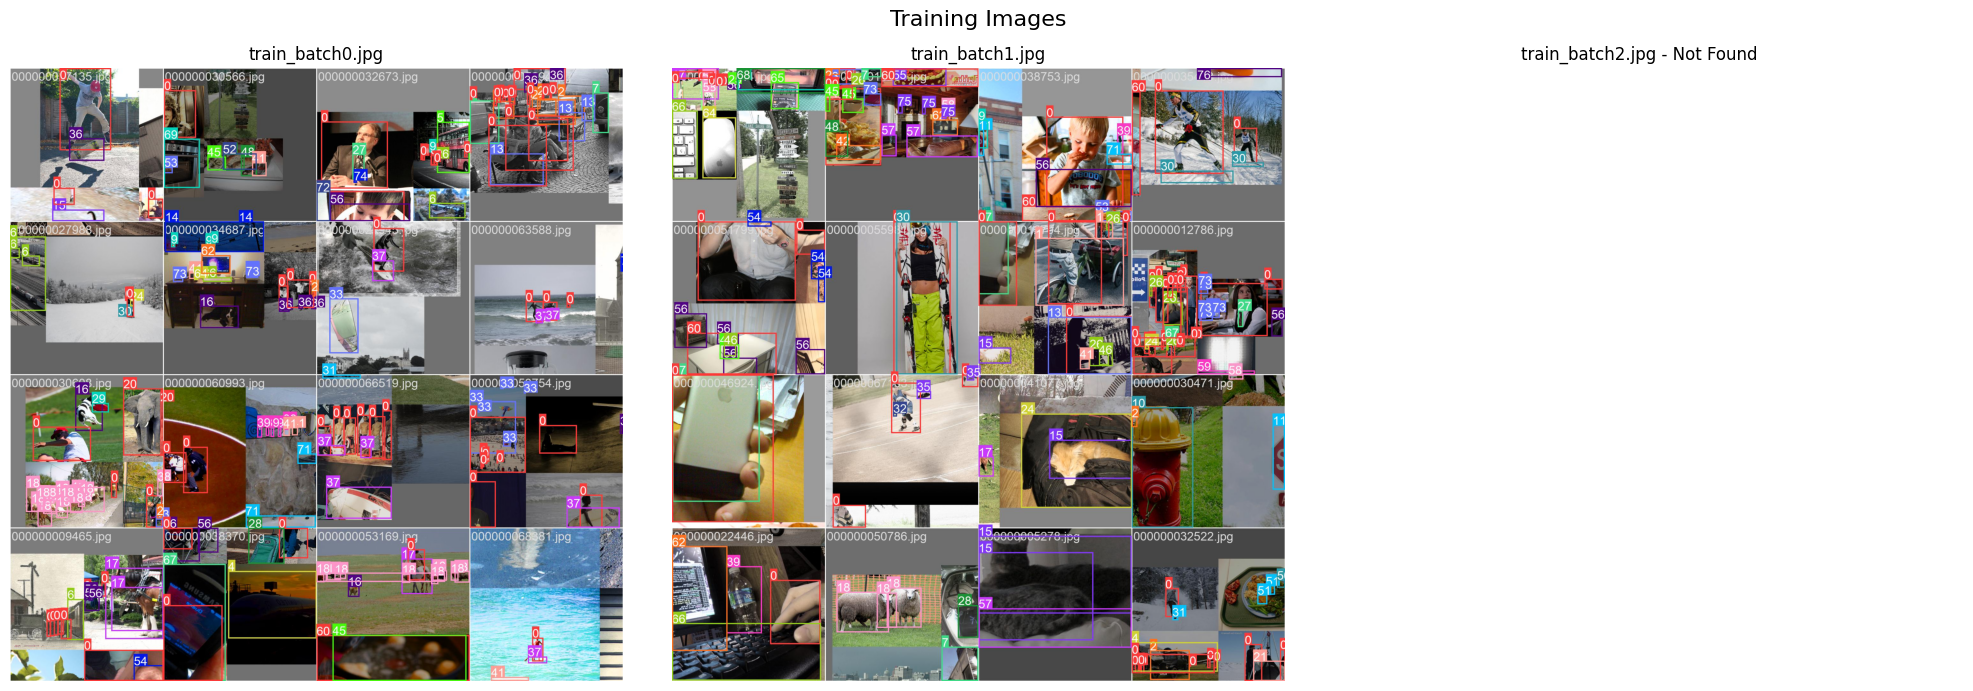

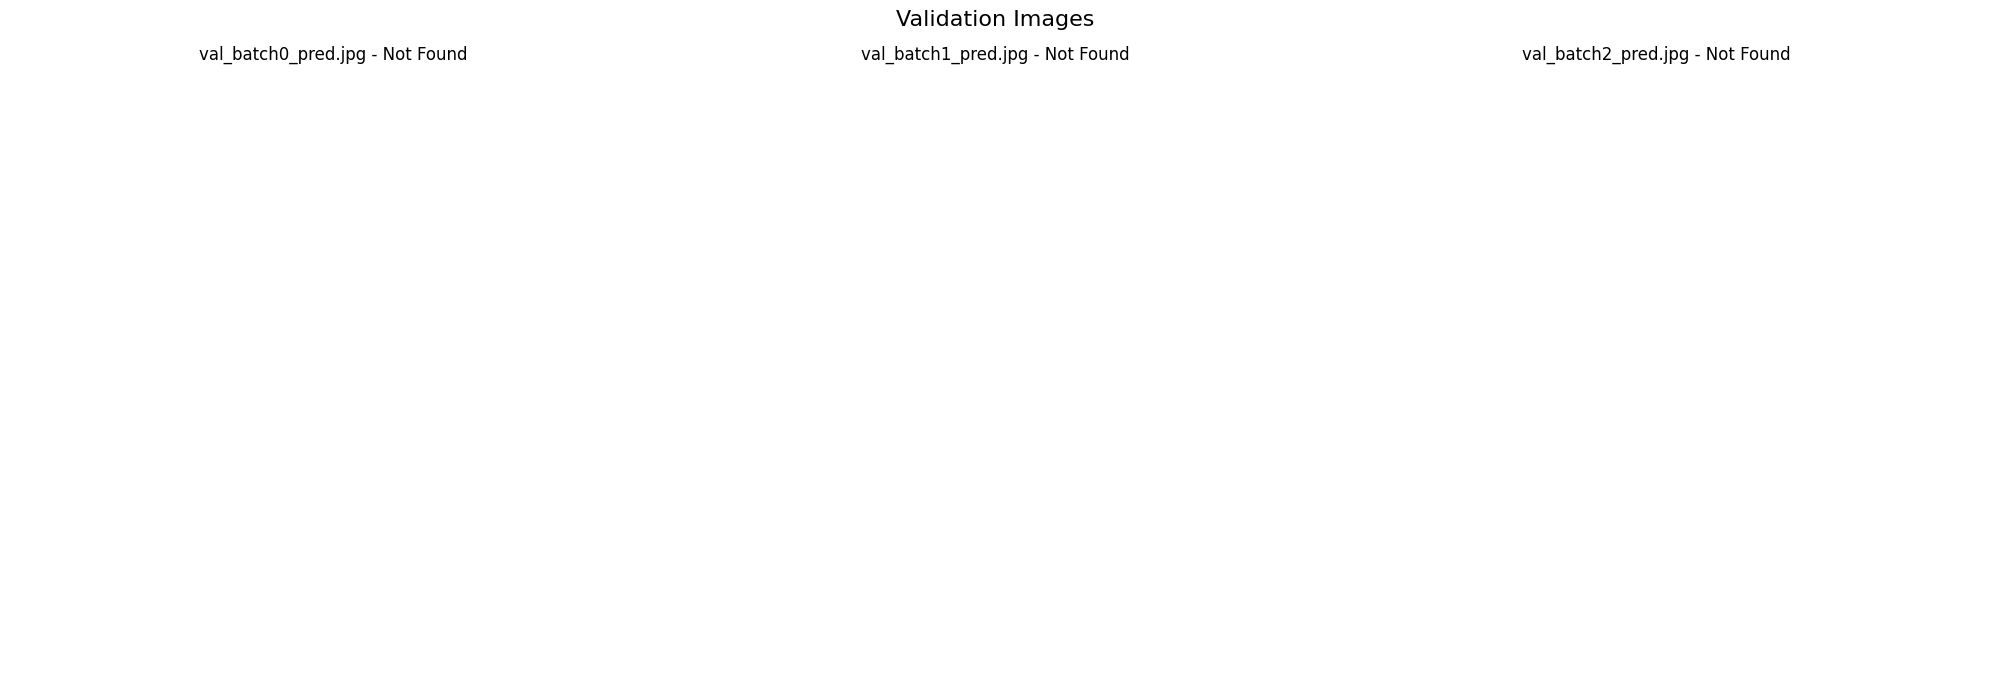

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_yolo_results(yolo_folder_name):
    """Display images from the latest experiment folder in YOLO."""
    
    def load_and_display_image(ax, path, title):
        """Load an image from the given path and display it on the given axis."""
        try:
            image = mpimg.imread(path)
            ax.imshow(image)
            ax.set_title(title)
            ax.axis('off')
        except FileNotFoundError:
            ax.set_title(f"{title} - Not Found")
            ax.axis('off')

    # Identify the latest experiment folder
    exp_folder = os.path.join(yolo_folder_name, "runs", "train", "exp")

    if os.path.exists(exp_folder):
        idx = 2
        while True:
            next_folder = os.path.join(yolo_folder_name, "runs", "train", f"exp{idx}")
            if not os.path.exists(next_folder):
                break
            exp_folder = next_folder
            idx += 1
    else:
        print("There is no exp folder! Maybe you never ran yolo?")
        return

    # List of image sets to display
    image_sets = [
        {"title": "Curves: F1, PR, P, R", "images": ["F1_curve.png", "PR_curve.png", "P_curve.png", "R_curve.png"], "layout": (2, 2)},
        {"title": "Confusion Matrix, Labels, Correlogram", "images": ["confusion_matrix.png", "labels.jpg", "labels_correlogram.jpg"], "layout": (1, 3)},
        {"title": "Training Images", "images": ["train_batch0.jpg", "train_batch1.jpg", "train_batch2.jpg"], "layout": (1, 3)},
        {"title": "Validation Images", "images": ["val_batch0_pred.jpg", "val_batch1_pred.jpg", "val_batch2_pred.jpg"], "layout": (1, 3)}
    ]

    for image_set in image_sets:
        fig = plt.figure(figsize=(20, 7 * image_set["layout"][0]))
        for i, image_name in enumerate(image_set["images"]):
            ax = fig.add_subplot(image_set["layout"][0], image_set["layout"][1], i+1)
            load_and_display_image(ax, os.path.join(exp_folder, image_name), image_name)
        fig.suptitle(image_set["title"], fontsize=16)
        plt.tight_layout()
        plt.show()

# 예제로 사용하기
display_yolo_results('yolov5')


In [2]:
import cv2
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use your model name here, e.g., 'yolov5s'

# Open the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference
    results = model(frame)

    # Render the results on the frame
    rendered_frame = results.render()[0]

    # Show the frame
    cv2.imshow('YOLOv5 Real-time Object Detection', rendered_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Using cache found in /Users/owo/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-9 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [1]:
import torch
from pathlib import Path
from PIL import Image, ImageDraw


# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' can be replaced with your custom model's path

# Inference on an image
img_path = Path("a.png")
results = model(img_path)

# Get detection results
detections = results.pred[0]  # Assuming only one image is processed

# Load the image using PIL
img = Image.open(img_path)

# Create a drawing object
draw = ImageDraw.Draw(img)

# Process each detection
for det in detections:
    class_id, confidence, bbox = det[5], det[4], det[:4]

    # Draw bounding box
    x, y, w, h = bbox
    left = x - w / 2
    top = y - h / 2
    right = x + w / 2
    bottom = y + h / 2

    draw.rectangle([left, top, right, bottom], outline="red", width=3)
    draw.text((left, top), f"Class {int(class_id)}: {confidence:.2f}", fill="red")

# Display the image with bounding boxes
img.show()

Using cache found in /Users/owo/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-9 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [13]:
import sys
sys.path.append("/Users/owo/HOUSE/@Code/@Project/ID_coco17/sort")

from sort_tracker import Sort

tracker = Sort()
detections = results.pred[0].cpu().numpy()[:, :-1]  # [x_center, y_center, width, height, conf]
detections[:, :2] = detections[:, :2] - detections[:, 2:4] / 2  # Convert center x, center y to top-left x, y
detections[:, 2:4] = detections[:, :2] + detections[:, 2:4]  # Convert width, height to bottom-right x, y
trackers = tracker.update(detections)

In [1]:
import sys
sys.path.append("/Users/owo/HOUSE/@Code/@Project/ID_coco17/sort")
import cv2
import torch
import numpy as np
from sort_tracker import Sort

# Initialize YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Initialize SORT tracker
tracker = Sort()

# Capture video from the default camera (usually webcam)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()
    if not ret:
        break

    # Inference using YOLOv5
    results = model(frame)
    detections = results.pred[0].cpu().numpy()[:, :-1]

    # Convert detections for SORT
    detections[:, :2] = detections[:, :2] - detections[:, 2:4] / 2
    detections[:, 2:4] = detections[:, :2] + detections[:, 2:4]
    
    # Update the tracker
    trackers = tracker.update(detections)

    # Draw bounding boxes with tracking IDs
    for track in trackers:
        x_min, y_min, x_max, y_max, track_id = map(int, track)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(frame, str(track_id), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with bounding boxes
    cv2.imshow("Live Tracker", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Using cache found in /Users/owo/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-9 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
import cv2

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("Webcam Test", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
